# Banning in League of Legends: does it matter?

In **League of Legends**, an online battle arena game in which players choose a character (a *champion*) with unique abilities and fight together in matches against an opposing team. It is very popular, and has a competitive player base.

The mechanics of the game aren't important for understanding this demo, but one mechanic is of interest: before each match, each team can choose to ban up to three champion types from the game. Teams may do this because they perceive particular champions as broken (unfair to use), or to give themselves an advantage in the match. However, it's generally not established what, if any, advantage banning a character gives to a team. We seek to ask questions on this topic here.

## About the dataset

Alyssa Adams has pulled data for each match from Riot Games' public API. For each match, we have a directory named with the match's unique ID, and this contains a couple things. For example:

In [1]:
%ls matches/2353211982

match.csv  Treant.c7633606-6432-4cb8-a673-1faa37f3a56b.json


This match contains a CSV file giving some of the most interesting match data to Alyssa, which we can parse using `pandas`:

In [2]:
import pandas as pd

In [3]:
pd.read_csv('matches/2353211982/match.csv', index_col=0)

,Player Name,Champion,Win,Side,Kills,Deaths,Assists,KDA,CS,SSpell 1,...,Item1,Item2,Item3,Item4,Item5,Item6,Magic Dmg,Physical Dmg,Lane,Role
0,Doublelift,Draven,False,Side.blue,1,5,1,0.400000,141,Flash,...,Doran's Blade,Caulfield's Warhammer,Cull,Infinity Edge,Boots of Speed,Dagger,916,52136,Lane.bot_lane,Role.carry
1,Stixxay,Vi,False,Side.blue,2,3,2,1.333333,105,Smite,...,Chain Vest,Refillable Potion,Ninja Tabi,Enchantment: Warrior,Giant's Belt,NaN,612,78017,Lane.jungle,Role.none
2,Pocket Rhino,Karma,False,Side.blue,1,3,4,1.666667,106,Flash,...,Haunting Guise,Athene's Unholy Grail,Ionian Boots of Lucidity,Doran's Ring,NaN,NaN,46740,7879,Lane.mid_lane,Role.solo
3,Old Man Lohpally,Nami,False,Side.blue,1,4,1,0.500000,11,Exhaust,...,Total Biscuit of Rejuvenation,Eye of the Watchers,Control Ward,Boots of Mobility,Tear of the Goddess,NaN,5274,3058,Lane.bot_lane,Role.support
4,Licorice,Jarvan IV,False,Side.blue,1,4,3,1.000000,97,Flash,...,Tiamat,Corrupting Potion,Doran's Blade,Chain Vest,Ninja Tabi,Bami's Cinder,2563,42171,Lane.top_lane,Role.solo
5,Hi Im A Sheep,Janna,True,Side.red,0,0,14,14.000000,6,Flash,...,Eye of the Watchers,Control Ward,NaN,Forbidden Idol,Crystalline Bracer,Ionian Boots of Lucidity,4298,3424,Lane.bot_lane,Role.support
6,Pyrites,Vel'Koz,True,Side.red,5,3,5,3.333333,133,Flash,...,Doran's Ring,Aether Wisp,Total Biscuit of Rejuvenation,Morellonomicon,Ionian Boots of Lucidity,Doran's Ring,58409,5572,Lane.mid_lane,Role.solo
7,Révenge,Yasuo,True,Side.red,8,3,3,3.666667,154,Teleport,...,Doran's Blade,Doran's Blade,Trinity Force,Phantom Dancer,Ninja Tabi,B. F. Sword,27726,76857,Lane.top_lane,Role.solo
8,windking66,Ezreal,True,Side.red,1,0,6,7.000000,154,Heal,...,Manamune,Doran's Blade,Ionian Boots of Lucidity,Cull,Iceborn Gauntlet,Vampiric Scepter,11608,55667,Lane.bot_lane,Role.carry
9,kms myself,Zac,True,Side.red,5,1,6,11.000000,136,Smite,...,Enchantment: Cinderhulk,Spirit Visage,Ionian Boots of Lucidity,Giant's Belt,Warden's Mail,NaN,91990,15130,Lane.jungle,Role.none


Each row corresponds to a given player in the match, and gives information such as what champion they used, which side they were on, how many kills, deaths, etc., and whether their team won.

In addition to this file, we also have a funny looking `Treant.*.json` file. This is a `datreant` state file, and it's pure JSON:

In [4]:
%cat matches/2353211982/Treant.c7633606-6432-4cb8-a673-1faa37f3a56b.json

{"categories": {"Map": "Map.summoners_rift", "Red Ban 3": "Lee Sin", "Hour": 0, "Season": "Season.preseason_7", "Region": "Region.north_america", "MatchID": 2353211982, "Month": 11, "Queue": "Queue.ranked_solo_queue", "Platform": "Platform.north_america", "VersionPatch": "6.22.165.9605", "Blue Ban 1": "Graves", "Mode": "GameMode.classic", "Blue Ban 3": "Ivern", "Year": 2016, "Duration": "0:21:12", "Red Ban 2": "LeBlanc", "Red Ban 1": "Ekko", "Type": "GameType.matched", "Day": 22, "Blue Ban 2": "Caitlyn"}, "tags": []}

We've used this to store information about the match as a whole, not player-specific data. This contains several `categories` (key-value pairs), giving things like the map, the game type, the duration, and, importantly for this study, which bans were chosen by each team. We could use any old JSON parser to use this file, such as the built-in `json.load` function:

In [5]:
import json

In [6]:
with open('matches/2353211982/Treant.c7633606-6432-4cb8-a673-1faa37f3a56b.json', 'r') as f:
    match = json.load(f)
match

{u'categories': {u'Blue Ban 1': u'Graves',
  u'Blue Ban 2': u'Caitlyn',
  u'Blue Ban 3': u'Ivern',
  u'Day': 22,
  u'Duration': u'0:21:12',
  u'Hour': 0,
  u'Map': u'Map.summoners_rift',
  u'MatchID': 2353211982,
  u'Mode': u'GameMode.classic',
  u'Month': 11,
  u'Platform': u'Platform.north_america',
  u'Queue': u'Queue.ranked_solo_queue',
  u'Red Ban 1': u'Ekko',
  u'Red Ban 2': u'LeBlanc',
  u'Red Ban 3': u'Lee Sin',
  u'Region': u'Region.north_america',
  u'Season': u'Season.preseason_7',
  u'Type': u'GameType.matched',
  u'VersionPatch': u'6.22.165.9605',
  u'Year': 2016},
 u'tags': []}

But instead we'll use this in a more refined way, using `datreant`:

In [7]:
import datreant.core as dtr

In [8]:
match = dtr.Treant('matches/2353211982')
match

<Treant: '2353211982'>

This file is a `datreant` state file, which stores the state for a `Treant`. This is a library that makes it easy to treat directories in the filesystem as logical units that can be introspected easily and tagged with metadata:

In [9]:
match.draw()

2353211982/
 +-- match.csv
 +-- Treant.c7633606-6432-4cb8-a673-1faa37f3a56b.json


In [10]:
match['match.csv'].read()

",Player Name,Champion,Win,Side,Kills,Deaths,Assists,KDA,CS,SSpell 1,SSpell 2,End Level,First Blood?,Gold Earned,Gold Spent,Item1,Item2,Item3,Item4,Item5,Item6,Magic Dmg,Physical Dmg,Lane,Role\n0,Doublelift,Draven,False,Side.blue,1,5,1,0.4,141,Flash,Heal,9,False,6616,6250,Doran's Blade,Caulfield's Warhammer,Cull,Infinity Edge,Boots of Speed,Dagger,916,52136,Lane.bot_lane,Role.carry\n1,Stixxay,Vi,False,Side.blue,2,3,2,1.3333333333333333,105,Smite,Flash,11,False,6616,5900,Chain Vest,Refillable Potion,Ninja Tabi,Enchantment: Warrior,Giant's Belt,,612,78017,Lane.jungle,Role.none\n2,Pocket Rhino,Karma,False,Side.blue,1,3,4,1.6666666666666667,106,Flash,Ghost,11,False,5760,5175,Haunting Guise,Athene's Unholy Grail,Ionian Boots of Lucidity,Doran's Ring,,,46740,7879,Lane.mid_lane,Role.solo\n3,Old Man Lohpally,Nami,False,Side.blue,1,4,1,0.5,11,Exhaust,Flash,9,False,4977,4275,Total Biscuit of Rejuvenation,Eye of the Watchers,Control Ward,Boots of Mobility,Tear of the Goddess,,5274,3058,Lane.bot_l

In [11]:
match.categories

<Categories({u'Map': u'Map.summoners_rift', u'Red Ban 3': u'Lee Sin', u'Hour': 0, u'Season': u'Season.preseason_7', u'Region': u'Region.north_america', u'MatchID': 2353211982, u'Month': 11, u'Queue': u'Queue.ranked_solo_queue', u'Platform': u'Platform.north_america', u'VersionPatch': u'6.22.165.9605', u'Blue Ban 1': u'Graves', u'Mode': u'GameMode.classic', u'Blue Ban 3': u'Ivern', u'Year': 2016, u'Duration': u'0:21:12', u'Red Ban 2': u'LeBlanc', u'Red Ban 1': u'Ekko', u'Type': u'GameType.matched', u'Day': 22, u'Blue Ban 2': u'Caitlyn'})>

In [12]:
match.categories['Map']

u'Map.summoners_rift'

Having our match data in this form lets us ask lots of questions with very little friction. If you're familiar with relational databases, in a way it lets one work with directories as if they were part of a relational database. And the files inside these directories can be **anything**, not just tables like we have here.

`Treant`s allow introspection into their own trees to any level of detail required, but we can do powerful things with them in aggregate. Let's gather all our matches up into a `Bundle`:

In [13]:
matches = dtr.discover('matches/')

In [14]:
len(matches)

5244

This `Bundle` has a few thousand `Treant`s. It's important to remember that a `Treant` is just a directory in the filesystem with a state file, which serves as:
1. a flag denoting the directory as a `Treant`, and
2. a store for identifying metadata that we choose.

The `Treant` object (that is, the Python object in memory) is itself very light. It only really amounts to a reference to the state file, which gets parsed on access of things like `tags` and `categories`.

A `Bundle` can be used to work with a collection of `Treant`s as if it was a single logical unit:

In [15]:
matches[:5].draw()

2359450630/
 +-- Treant.1bf087dc-24c8-4982-9c18-24f8b8a9809d.json
 +-- match.csv
2363071768/
 +-- Treant.cbd4a102-e9bd-4db8-a723-9c1f8804e34b.json
 +-- match.csv
2353972809/
 +-- match.csv
 +-- Treant.db872e16-43f1-4a69-ad2b-fbabbce7d35e.json
2361686875/
 +-- Treant.e5d550c0-9995-4f5f-afa0-1a19f31c2d1e.json
 +-- match.csv
2361675597/
 +-- Treant.42fd8b90-725e-4a83-9829-7249459e2727.json
 +-- match.csv


We can, for example, get back any category keys present among these `Treant`s:

In [16]:
matches.categories.any.keys()

[u'Map',
 u'Red Ban 3',
 u'Hour',
 u'Year',
 u'Season',
 u'fluffy',
 u'MatchID',
 u'Month',
 u'Queue',
 u'Platform',
 u'VersionPatch',
 u'Blue Ban 1',
 u'Mode',
 u'Blue Ban 3',
 u'Blue Ban 2',
 u'Duration',
 u'Red Ban 2',
 u'Red Ban 1',
 u'Region',
 u'Type',
 u'Day']

And perhaps get back the values for one:

In [25]:
matches[:10].categories['Mode']

[u'GameMode.classic',
 u'GameMode.classic',
 u'GameMode.classic',
 u'GameMode.classic',
 u'GameMode.classic',
 u'GameMode.classic',
 u'GameMode.classic',
 u'GameMode.classic',
 u'GameMode.classic',
 u'GameMode.classic']

## If Teemo is banned, is his team more or less likely to win (or neither)?

For starters, we'll ask a simple question. If the champion *Teemo* is banned, does this make his team more likely to win? Does it make any difference? First, we need to extract matches in which Teemo is banned. Let's keep blue and red bans separate for now, since this might make answering the question easier later.

First, we'll get all the matches in which the blue team banned *Teemo*:

In [18]:
blueban = dtr.Bundle([matches.categories.groupby(ban)['Teemo'] for ban in ('Blue Ban 1', 'Blue Ban 2', 'Blue Ban 3')])

In [19]:
blueban

<Bundle([<Treant: '2358429974'>, <Treant: '2359613323'>, <Treant: '2356208063'>, <Treant: '2357946733'>, <Treant: '2365070298'>, <Treant: '2363656370'>, <Treant: '2362300366'>, <Treant: '2353277148'>, <Treant: '2356102823'>, <Treant: '2361668484'>, <Treant: '2359826812'>, <Treant: '2362658805'>, <Treant: '2363940703'>])>

And we'll do the same for the red team:

In [20]:
redban = dtr.Bundle([matches.categories.groupby(ban)['Teemo'] for ban in ('Red Ban 1', 'Red Ban 2', 'Red Ban 3')])

In [21]:
redban

<Bundle([<Treant: '2364722045'>, <Treant: '2358810869'>, <Treant: '2359142368'>, <Treant: '2364861102'>, <Treant: '2355510307'>, <Treant: '2353779432'>, <Treant: '2356203166'>, <Treant: '2353343511'>, <Treant: '2353591503'>, <Treant: '2363881294'>, <Treant: '2358936032'>, <Treant: '2358759278'>, <Treant: '2362831230'>, <Treant: '2364853411'>, <Treant: '2356318495'>, <Treant: '2361485395'>, <Treant: '2355511251'>, <Treant: '2360581895'>, <Treant: '2362170628'>, <Treant: '2357290762'>, <Treant: '2361910541'>, <Treant: '2354772707'>, <Treant: '2363076685'>, <Treant: '2361483300'>, <Treant: '2358621768'>])>

Because `Bundle`s behave as ordered sets, if we wanted all the matches where Teemo was banned by at least one team, then we could get it with:

In [26]:
redban + blueban

<Bundle([<Treant: '2364722045'>, <Treant: '2358810869'>, <Treant: '2359142368'>, <Treant: '2364861102'>, <Treant: '2355510307'>, <Treant: '2353779432'>, <Treant: '2356203166'>, <Treant: '2353343511'>, <Treant: '2353591503'>, <Treant: '2363881294'>, <Treant: '2358936032'>, <Treant: '2358759278'>, <Treant: '2362831230'>, <Treant: '2364853411'>, <Treant: '2356318495'>, <Treant: '2361485395'>, <Treant: '2355511251'>, <Treant: '2360581895'>, <Treant: '2362170628'>, <Treant: '2357290762'>, <Treant: '2361910541'>, <Treant: '2354772707'>, <Treant: '2363076685'>, <Treant: '2361483300'>, <Treant: '2358621768'>, <Treant: '2358429974'>, <Treant: '2359613323'>, <Treant: '2356208063'>, <Treant: '2357946733'>, <Treant: '2365070298'>, <Treant: '2363656370'>, <Treant: '2362300366'>, <Treant: '2353277148'>, <Treant: '2356102823'>, <Treant: '2361668484'>, <Treant: '2359826812'>, <Treant: '2362658805'>, <Treant: '2363940703'>])>

And if we wanted all matches where Teemo was banned by *both* teams, we could do an intersection of the two:

In [27]:
redban & blueban

<Bundle([])>

This is expected, because both teams can't ban the same champion. This is a nice check. :)

For red team bans, how many of those matches did the red team lose? Looking at what a given match CSV gives us:

In [28]:
df = pd.read_csv(redban[0]['match.csv'].abspath, index_col=0)
df

,Player Name,Champion,Win,Side,Kills,Deaths,Assists,KDA,CS,SSpell 1,...,Item1,Item2,Item3,Item4,Item5,Item6,Magic Dmg,Physical Dmg,Lane,Role
0,Koyori,Nami,True,Side.blue,4,2,15,9.500000,4,Exhaust,...,Frost Queen's Claim,Redemption,NaN,Sightstone,Boots of Mobility,NaN,7571,4104,Lane.bot_lane,Role.support
1,TNL Astatine,Jhin,True,Side.blue,9,6,8,2.833333,128,Flash,...,Zeal,Essence Reaver,Kircheis Shard,Doran's Blade,NaN,Boots of Swiftness,1592,89816,Lane.bot_lane,Role.carry
2,Xelverak,Nasus,True,Side.blue,2,3,2,1.333333,155,Teleport,...,Doran's Ring,Corrupting Potion,Zz'Rot Portal,Doran's Ring,Boots of Speed,Sheen,60591,36817,Lane.top_lane,Role.solo
3,LL Foil,Elise,True,Side.blue,9,4,8,4.250000,87,Flash,...,Ionian Boots of Lucidity,Hunter's Potion,Control Ward,Enchantment: Runic Echoes,Rylai's Crystal Scepter,Hextech Protobelt-01,64562,24447,Lane.jungle,Role.none
4,Butler Epsilon,Ryze,True,Side.blue,4,5,6,2.000000,168,Flash,...,Archangel's Staff,NaN,The Dark Seal,NaN,Rod of Ages,Sorcerer's Shoes,105988,9350,Lane.mid_lane,Role.solo
5,holygoose,Ashe,False,Side.red,3,10,5,0.800000,19,Ignite,...,Sightstone,Pickaxe,Ionian Boots of Lucidity,Rapid Firecannon,B. F. Sword,NaN,3156,22902,Lane.bot_lane,Role.support
6,Krypt,Jinx,False,Side.red,3,6,5,1.333333,142,Flash,...,Brawler's Gloves,Infinity Edge,Runaan's Hurricane,Dagger,Doran's Blade,Berserker's Greaves,833,78174,Lane.bot_lane,Role.carry
7,Azhi Dahaki,Shyvana,False,Side.red,3,6,3,1.000000,97,Smite,...,Enchantment: Bloodrazor,Refillable Potion,Titanic Hydra,Mercury's Treads,NaN,NaN,32708,47144,Lane.jungle,Role.none
8,Happy Birfdizzay,Twitch,False,Side.red,7,3,1,2.666667,178,Flash,...,Long Sword,Runaan's Hurricane,B. F. Sword,Lord Dominik's Regards,Berserker's Greaves,Doran's Blade,0,99027,Lane.mid_lane,Role.solo
9,Lord Gomenator,Maokai,False,Side.red,4,3,5,3.000000,146,Flash,...,Doran's Ring,Spirit Visage,Chain Vest,Doran's Ring,Mercury's Treads,Bami's Cinder,81784,9724,Lane.top_lane,Role.solo


We could get this by checking if the word `'blue'` is in the `'Win'` column for rows where that column gives `True`:

In [29]:
def blue_win(match):
    df = pd.read_csv(match['match.csv'].abspath, index_col=0)
    return 'blue' in df[df['Win'] == True]['Side'].iloc[0]

So we could then get back a list of bools telling us which matches blue won among those where the red team banned *Teemo*:

In [30]:
redban_blue_wins = redban.map(blue_win)
redban_blue_wins

[True,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True]

Did red win more often than they lost? Here are the matches red won:

In [31]:
len(redban - redban[redban_blue_wins])

15

Here are the number of matches red lost:

In [32]:
len(redban[redban_blue_wins])

10

We used this list of bools as a boolean index for our `redban` `Bundle`, here.

### What do we get for the case where blue bans Teemo?

We'll do the same thing for matches in which the blue team banned *Teemo*:

In [33]:
blueban_blue_wins = blueban.map(blue_win)
blueban_blue_wins

[False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True]

Did blue win more often than they lost? Here are the matches blue won:

In [34]:
len(blueban[blueban_blue_wins])

6

Here are the number of matches blue lost:

In [35]:
len(blueban - blueban[blueban_blue_wins])

7

Hmmm...maybe not a signal here, but the number of samples is pretty small anyhow to say anything.

# Who is the most banned character? Does banning this character make your team more likely to win?

We want to take to task some conventional wisdom that may be floating around the community about which characters you should ban if you want to increase your chances to win. Let's see if this holds water.

First we need to find the most banned character. Probably lots of ways to get at this, but one thing we can do is a `groupby` on each ban slot as before, for each building a dictionary giving banned champions as keys and the number of matches they were banned in as values:

In [36]:
counts = pd.DataFrame({ban: {key: len(value) for key, value in matches.categories.groupby(ban).items()} for ban in ('Blue Ban 1', 'Blue Ban 2', 'Blue Ban 3', 'Red Ban 1', 'Red Ban 2', 'Red Ban 3')})
counts

,Blue Ban 1,Blue Ban 2,Blue Ban 3,Red Ban 1,Red Ban 2,Red Ban 3
Aatrox,77,68,95,93,93,67
Ahri,5,11,6,7,5,11
Akali,4,7,3,3,5,4
Alistar,14,21,18,22,21,24
Amumu,7,14,9,9,10,9
Anivia,2,2,1,3,8,5
Annie,11,12,10,12,12,3
Ashe,1,NaN,NaN,1,NaN,1
Aurelion Sol,17,14,19,9,14,19
Azir,1,NaN,4,4,NaN,NaN


We can then sum across columns and sort to get a ranking of banned champions across all matches:

In [37]:
counts.sum(axis=1).sort_values(ascending=False)

Rengar          3514
Hecarim         2779
LeBlanc         2646
Ivern           2549
Syndra          2143
Vayne           1696
Kha'Zix         1510
Ryze            1459
Zac             1243
Katarina        1240
Jayce           1031
Lee Sin          849
Graves           776
Yasuo            677
Aatrox           493
Riven            467
Olaf             415
Evelynn          405
Poppy            385
Talon            343
Janna            329
Twitch           320
Kennen           313
Vi               278
Fizz             252
Shyvana          191
Caitlyn          188
Shaco            176
Cassiopeia       149
Zyra             133
                ... 
Cho'Gath           6
Ziggs              6
Skarner            5
Sejuani            5
Swain              5
Leona              5
Kindred            5
Volibear           5
Kassadin           5
Lulu               5
Udyr               4
Kalista            4
Kog'Maw            4
Lissandra          4
Taliyah            4
Jarvan IV          4
Miss Fortune 

So we have our answer. The most banned is **Rengar**.

Out of curiosity, what's the distribution of bans look like across champions?

In [38]:
%matplotlib inline

/home/alter/.virtualenvs/datreant/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


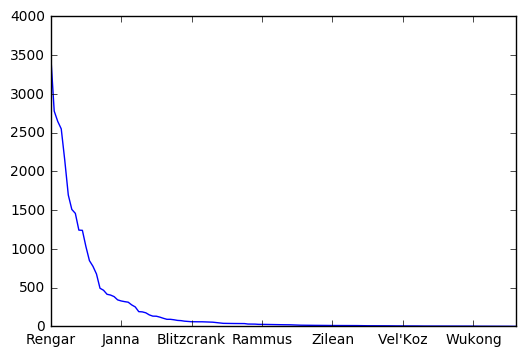

In [39]:
counts.sum(axis=1).sort_values(ascending=False).plot()

## Does banning Rengar make you more likely to win?

We'll do the same analysis we did for *Teemo*, but now for *Rengar*.

In [40]:
blueban = dtr.Bundle([matches.categories.groupby(ban)['Rengar'] for ban in ('Blue Ban 1', 'Blue Ban 2', 'Blue Ban 3')])
len(blueban)

1855

In [41]:
redban = dtr.Bundle([matches.categories.groupby(ban)['Rengar'] for ban in ('Red Ban 1', 'Red Ban 2', 'Red Ban 3')])
len(redban)

1659

For red team bans, how many of those matches did the red team lose?

Did red win more often than they lost? Here are the matches red won:

In [42]:
len(redban - redban[redban.map(blue_win)])

820

Here are the number of matches red lost:

In [43]:
len(redban[redban.map(blue_win)])

839

### What do we get for the case where blue bans Rengar?

Did blue win more often than they lost? Here are the matches blue won:

In [44]:
len(blueban[blueban.map(blue_win)])

934

Here are the number of matches blue lost:

In [45]:
len(blueban - blueban[blueban.map(blue_win)])

921

Hmmm...maybe not a signal here...might not be much point overall to banning Rengar. However, it may be the case that if you ban Rengar and perhaps another character this improves your chances? That's an interesting question for another time. Could it also be the case that banning Rengar levels the playing field?

# In a game where Rengar wasn't banned, was he picked? Was the team more likely win?

We already know that banning *Rengar* doesn't seem to make your team more likely to win, but does **not** banning him make a team with *Rengar* more likely to win? Is he even picked by a player?

First we need matches where Rengar was not banned. We'll iterate through all ban slots, grab out the matches where the banned champion was *Rengar*, then combine these `Bundle`s into a single one. We can then subtract this `Bundle` from all the matches to get only those where *Rengar* was **not** banned:

In [46]:
rengar_not_banned = matches - dtr.Bundle([matches.categories.groupby(ban)['Rengar'] for ban in ('Blue Ban 1', 'Blue Ban 2', 'Blue Ban 3', 'Red Ban 1', 'Red Ban 2', 'Red Ban 3')])
len(rengar_not_banned)

1730

So now, which matches was Rengar present in? We can get this like we did before, by checking each match CSV. this time, we just want to know if `'Rengar'` shows up in `'Champion'` column:

In [47]:
def has_rengar(match):
    df = pd.read_csv(match['match.csv'].abspath, index_col=0)
    return len(df[df['Champion'] == 'Rengar']) == 1

In [48]:
matches_has_rengar = rengar_not_banned[rengar_not_banned.map(has_rengar)]
len(matches_has_rengar)

372

## If a team had a Rengar, were they more likely to win?

So, if a team has a *Rengar*, did they also tend to win? We can check the CSV files again to see if the player using *Rengar* was also on the winning team:

In [49]:
def rengar_won(match):
    df = pd.read_csv(match['match.csv'].abspath, index_col=0)
    return bool(df[df['Champion'] == 'Rengar']['Win'].iloc[0])

Number of wins:

In [50]:
len(matches_has_rengar[matches_has_rengar.map(rengar_won, processes=4)])

192

Number of losses:

In [51]:
len(matches_has_rengar - matches_has_rengar[matches_has_rengar.map(rengar_won, processes=4)])

180

Doesn't really look like he confers too much of an advantage, but perhaps a slight one?

## Other questions we can ask...

There are tons of questions we can ask, and even complex ones are surprisingly easy to do so given the way we've structured our data, and how `datreant` allows us to work with it. Here's a smattering:
1. Is there *any* champion that seems to confer a systematic advantage to the team that has it? If it appears so, can we isolate the effect from other possible factors?
2. Is there any *combination* of champion bans that make a team more likely to win? Does it depend heavily on the team?
3. Which teams ban the same champions the most? Can we guess why from the data?

## Bonus: does having any particular champion on your team appear to give you an advantage?

We can do a similar analysis as we did for *Rengar* on all champions, and if it's the case that having a particular champion on your team results in more wins on average, we can begin drilling down into more questions to establish *why*. First let's see what we get.

We'll gather all dataframes into a single, big dataframe with an extra index giving the uuid of the `Treant` for unique identification. This will make writing code that gets the number of wins/losses for a particular champion faster, since we can operate on a single `DataFrame` instead of ~5000:

In [52]:
match_dfs = [pd.read_csv(match['match.csv'].abspath, index_col=0) for match in matches]
bigdf = pd.concat(match_dfs, keys=matches.uuids, names=['uuids'])

In [53]:
bigdf

Player Name      Champion    Win  \
uuids                                                                           
1bf087dc-24c8-4982-9c18-24f8b8a9809d 0  Anonymity Missay  Twisted Fate  False   
                                     1      Queen Cersei         Janna  False   
                                     2  Tyrion with xBow         Vayne  False   
                                     3             KOKOA        Gragas  False   
                                     4     UseIess Riven         Riven  False   
                                     5  9point5mechanics       LeBlanc   True   
                                     6  We Win Late Game    Tahm Kench   True   
                                     7       keine Hosen          Jhin   True   
                                     8          LADYBABY      Malphite   True   
                                     9             Zorki       Lee Sin   True   
cbd4a102-e9bd-4db8-a723-9c1f8804e34b 0    CUTE TOXIC MID          Sion   True   
                                     1         Savâgekit        Anivia   True   
                                     2         edbickham         Jayce   True   
                                     3         Nickymosh            Vi   True   
                                     4             Kiqko        Ezreal   True   
                                     5            Fledge        Viktor  False   
                                     6             Sud83       Kha'Zix  False   
                                     7         Welshy JR    Blitzcrank  False   
                                     8    TrustInMyCards        Yorick  False   
                                     9          JoeJacko       Caitlyn  False   
db872e16-43f1-4a69-ad2b-fbabbce7d35e 0    Emilia Is Love        Ezreal  False   
                                     1   retarded virgin        Graves  False   
                                     2              Koby         Nasus  False   
                                     3             Shrew         Karma  False   
                                     4           Rip Cig       Vel'Koz  False   
                                     5            Feitan       Lee Sin   True   
                                     6           FIoopie       Caitlyn   True   
                                     7         TRAVYPOOO      Xin Zhao   True   
                                     8     MongolWarrior         Corki   True   
                                     9         zz cicero         Poppy   True   
...                                                  ...           ...    ...   
5fa307d3-30b8-40e5-bcd6-80013952e244 0         C9 Waygzh          Nunu   True   
                                     1            Dexima         Poppy   True   
                                     2        Cat Person         Janna   True   
                                     3    Falco Mechanic         Vayne   True   
                                     4          MindCalm    Cassiopeia   True   
                                     5          TaeYeonT        Ezreal  False   
                                     6       HanzoSanada        Maokai  False   
                                     7    IIlIllIIlllIII       Morgana  False   
                                     8          always4u          Ahri  False   
                                     9   HvK LiquidDiego       Lee Sin  False   
61bdd566-3049-48ad-be06-287f9adba3ca 0   BestFriendDavis           Lux  False   
                                     1    King slayerdan       Sejuani  False   
                                     2      LIG Forgiven        Twitch  False   
                                     3           zBalrog          Bard  False   
                                     4     WatchThePower         Riven  False   
                                     5      c0uchwarrior        Graves   True   
                                     6       Alan Senpai         Taric   Tru

We'll then write two quick-and-dirty functions (probably better to combine them, but whatever for now), that tell us how many wins a champion saw or how many losses:

In [54]:
def match_result_champion(champion, win=True):
    df = bigdf[bigdf['Win'] == win]
    df = df[df['Champion'] == champion]
    
    return len(df)

For example:

In [55]:
match_result_champion('Rengar', win=True)

192

Let's get a full list of the available champions from our dataframe:

In [56]:
champions = list(bigdf['Champion'].unique())
len(champions)

133

Now we can get the number of wins for every champion:

In [57]:
champion_won = {champion: match_result_champion(champion, win=True) for champion in champions}

...and the number of losses:

In [58]:
champion_lost = {champion: match_result_champion(champion, win=False) for champion in champions}

So now we can build `pandas` Series objects directly from these, for easy statistics work:

In [59]:
num_wins = pd.Series(champion_won)

In [60]:
num_lost = pd.Series(champion_lost)

And perhaps we can see which characters correlate with more wins (or losses).

In [61]:
percent_win = ((num_wins - num_lost)*100.0 / (num_wins + num_lost)).sort_values(ascending=False)
percent_win

Urgot           23.404255
Rumble          17.482517
Xerath          15.476190
Taric           14.285714
LeBlanc         14.247670
Jax             13.114754
Kindred         12.676056
Udyr             9.677419
Hecarim          9.427609
Ivern            9.417040
Mordekaiser      9.090909
Vel'Koz          8.270677
Warwick          8.108108
Twitch           7.915994
Morgana          7.171315
Rammus           6.944444
Kha'Zix          6.666667
Quinn            6.422018
Swain            6.410256
Rek'Sai          6.013363
Anivia           5.952381
Kayle            5.759162
Shaco            5.752212
Brand            5.474453
Riven            5.106778
Kennen           5.099778
Volibear         4.918033
Darius           4.891304
Vi               4.656863
Vayne            4.295943
                  ...    
Fiora           -6.989247
Diana           -7.006369
Fizz            -7.122507
Irelia          -7.167235
Trundle         -7.766990
Wukong          -8.000000
Ekko            -8.733624
Aatrox      

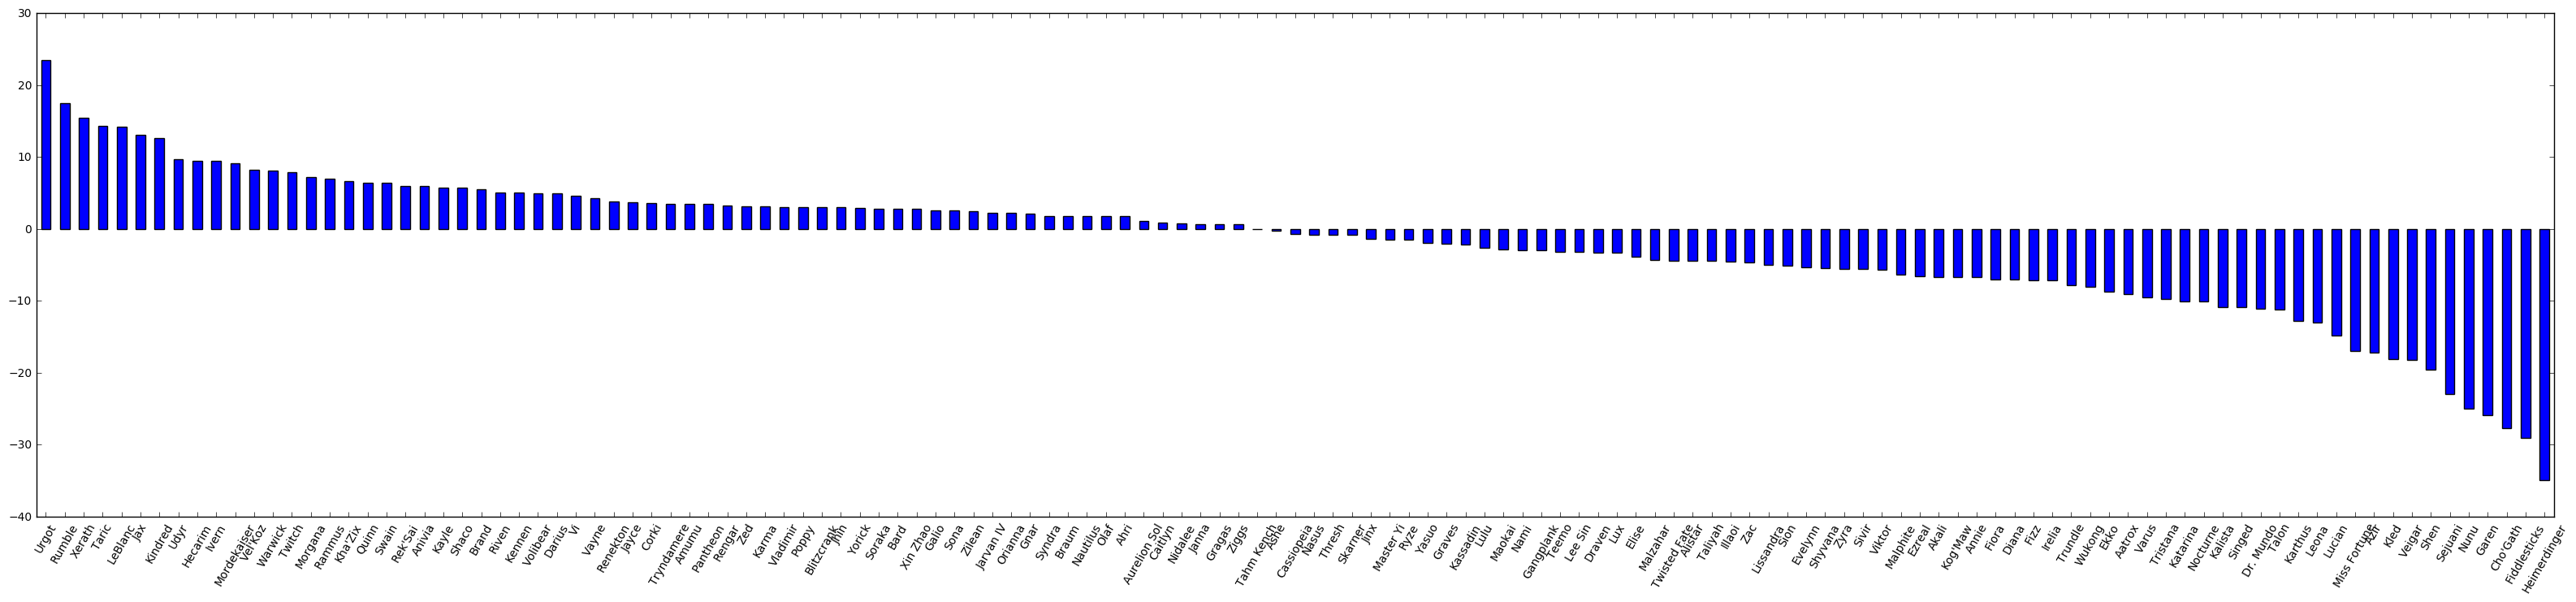

In [62]:
ax = percent_win.plot.bar(figsize=(40, 8))

for item in ax.get_xticklabels():
    item.set_rotation(60)

From here we can start to ask *why* some champions appear advantageous from these match data.